In [1]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

# Data Preprocessing

In [4]:
ell = np.load('/content/drive/MyDrive/Colab Notebooks/PHY391 MLPR/Data/galaxy_zoo_elliptical.npy')
spi = np.load('/content/drive/MyDrive/Colab Notebooks/PHY391 MLPR/Data/galaxy_zoo_spiral.npy')

In [5]:
ell.shape, spi.shape

((5000, 106, 106, 3), (5000, 106, 106, 3))

In [6]:
ell.max(), ell.min(), spi.max(), spi.min()

(255, 0, 255, 0)

In [7]:
ell = ell / 255
spi = spi / 255

Text(0.5, 0.98, 'Elliptical Galaxies')

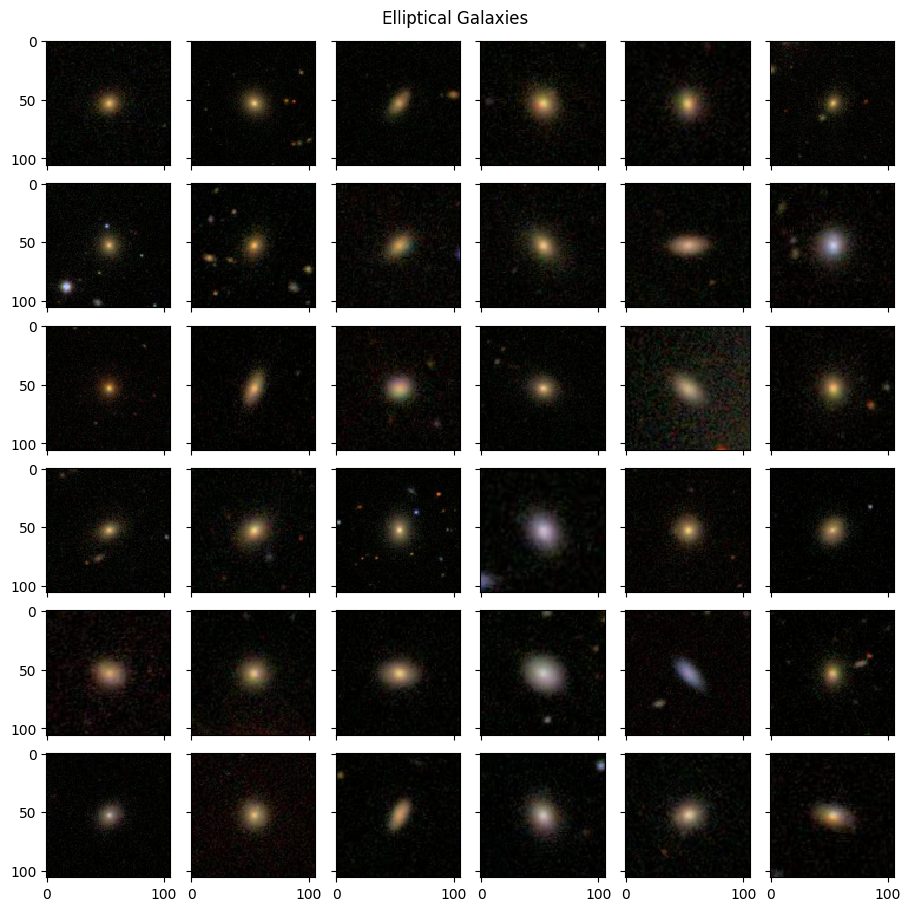

In [8]:
fig, axes = plt.subplots(6, 6, figsize=(9,9),
                         sharex=True, sharey=True,
                        layout='constrained')
for i in range(36):
    axes[i // 6, i % 6].imshow(ell[i])

plt.suptitle('Elliptical Galaxies', fontsize=12)

Text(0.5, 0.98, 'Spiral Galaxies')

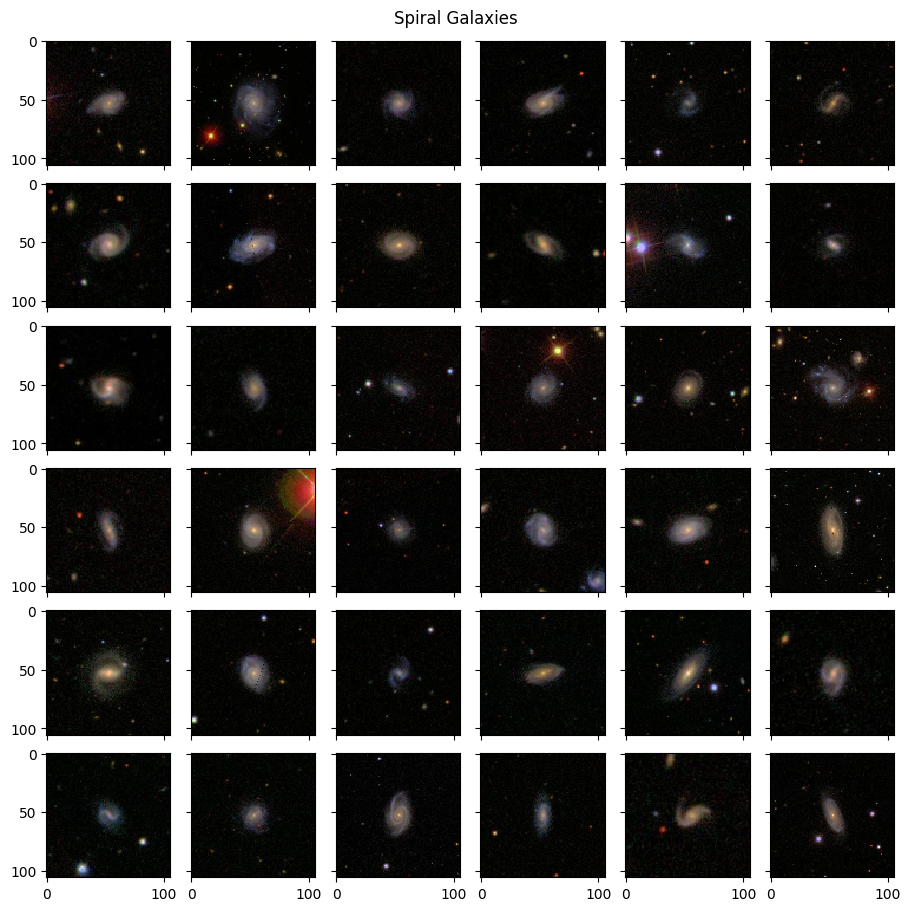

In [9]:
fig, axes = plt.subplots(6, 6, figsize=(9,9),
                         sharex=True, sharey=True,
                        layout='constrained')
for i in range(36):
    axes[i // 6, i % 6].imshow(spi[i])
plt.suptitle('Spiral Galaxies', fontsize=12)

In [8]:
ell = ell[:, 30: -30, 30: -30]
spi = spi[:, 30: -30, 30: -30]

In [9]:
ell.shape, spi.shape

((5000, 46, 46, 3), (5000, 46, 46, 3))

Text(0.5, 0.98, 'Elliptical Galaxies')

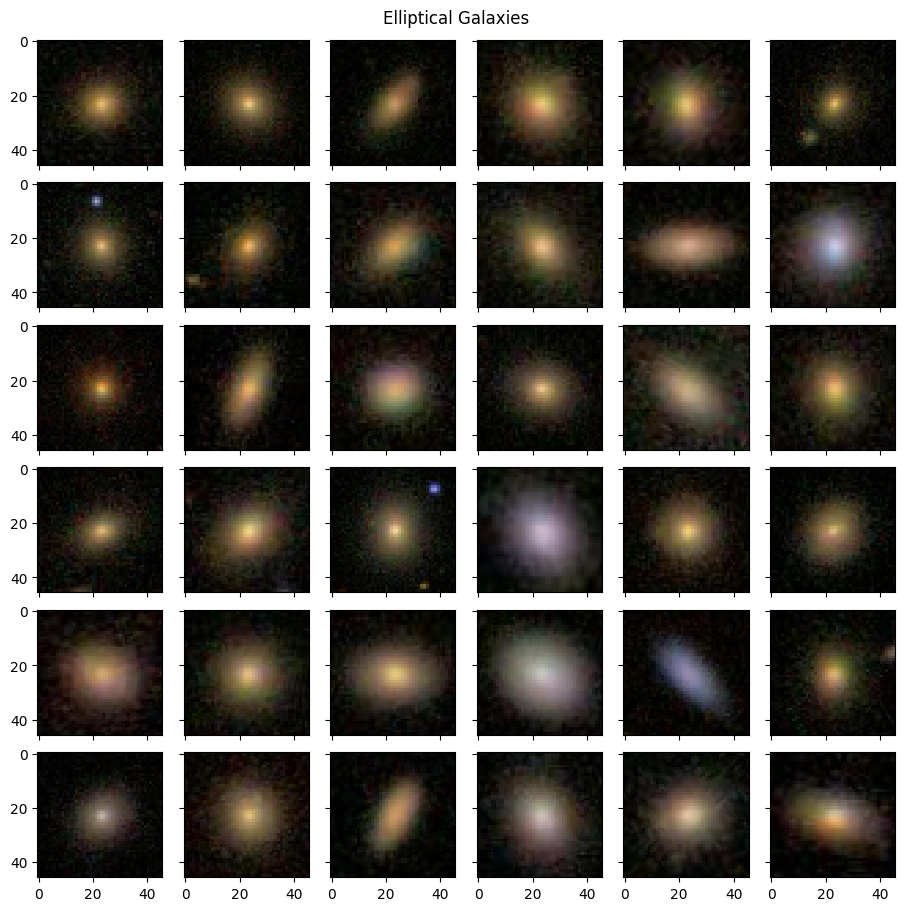

In [12]:
fig, axes = plt.subplots(6, 6, figsize=(9,9),
                         sharex=True, sharey=True,
                        layout='constrained')
for i in range(36):
    axes[i // 6, i % 6].imshow(ell[i])

plt.suptitle('Elliptical Galaxies', fontsize=12)

Text(0.5, 0.98, 'Spiral Galaxies')

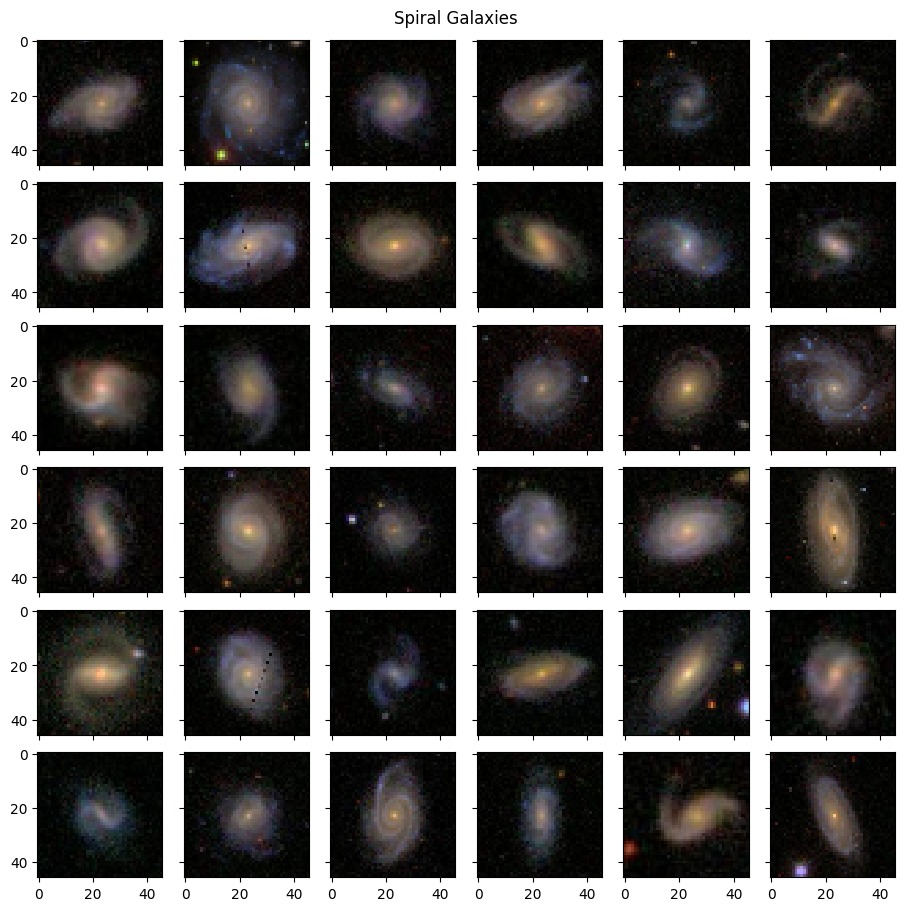

In [13]:
fig, axes = plt.subplots(6, 6, figsize=(9,9),
                         sharex=True, sharey=True,
                        layout='constrained')
for i in range(36):
    axes[i // 6, i % 6].imshow(spi[i])
plt.suptitle('Spiral Galaxies', fontsize=12)

In [10]:
ell_lum = ell.mean(axis=-1)
spi_lum = spi.mean(axis=-1)

Text(0.5, 0.98, 'Elliptical Galaxies Luminosity')

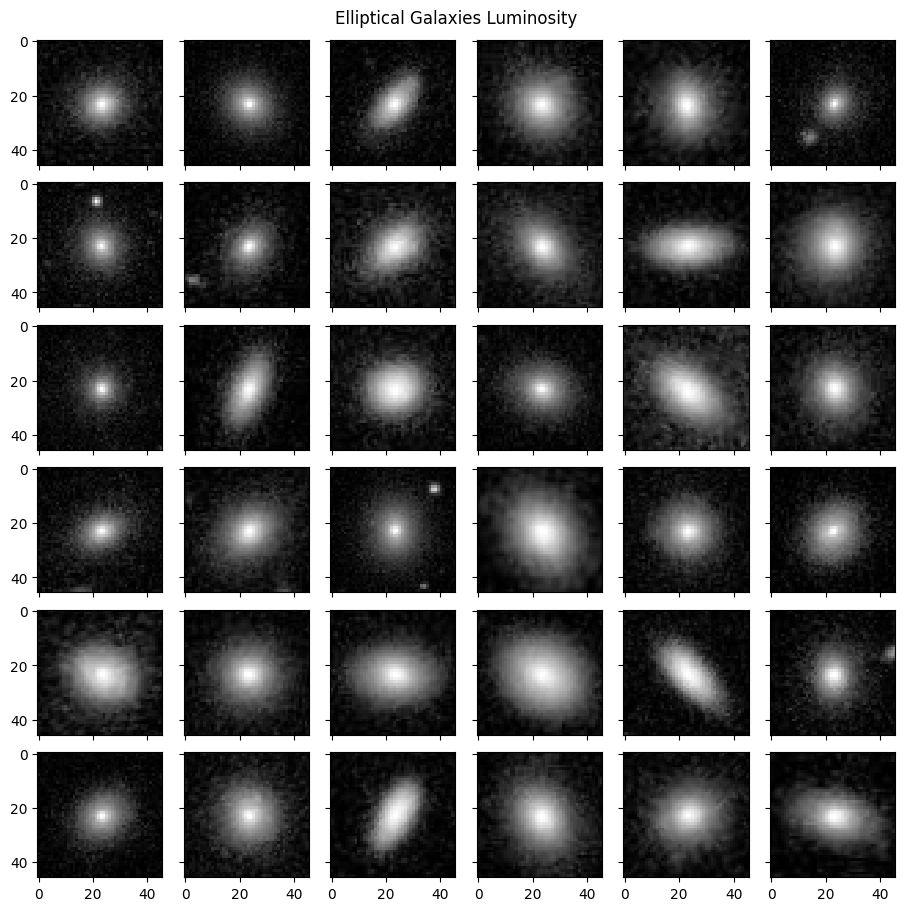

In [15]:
fig, axes = plt.subplots(6, 6, figsize=(9,9),
                         sharex=True, sharey=True,
                        layout='constrained')
for i in range(36):
    axes[i // 6, i % 6].imshow(ell_lum[i])
plt.suptitle('Elliptical Galaxies Luminosity', fontsize=12)

Text(0.5, 0.98, 'Spiral Galaxies Luminosity')

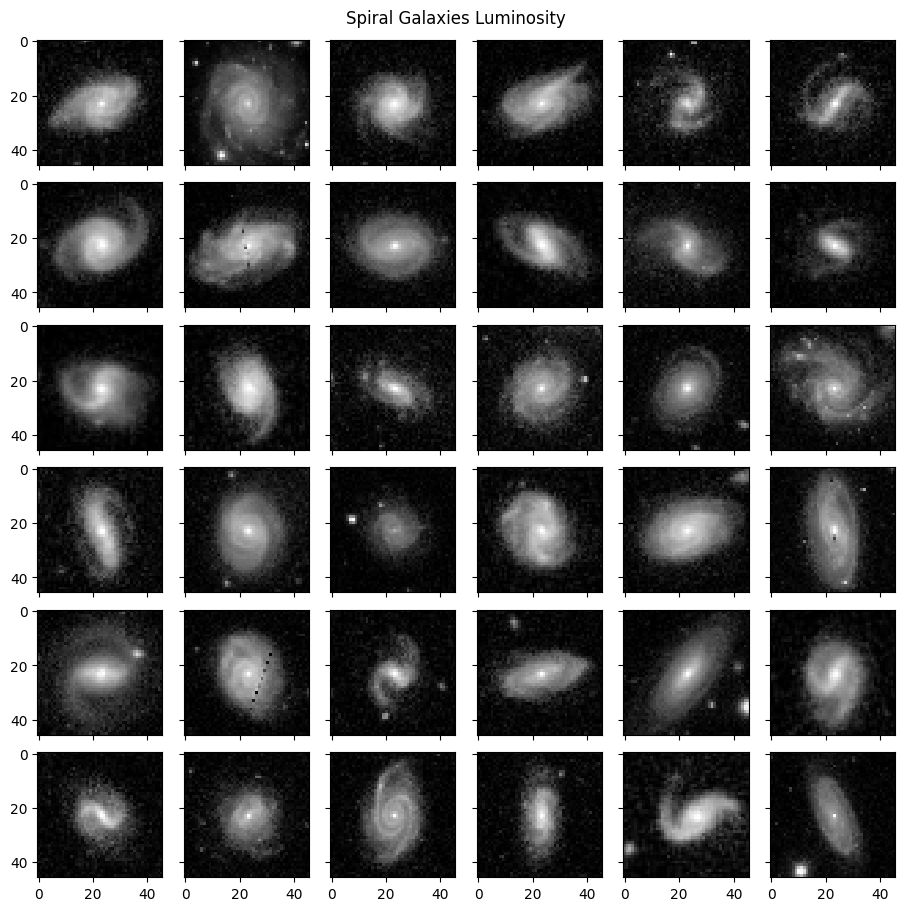

In [16]:
fig, axes = plt.subplots(6, 6, figsize=(9,9),
                         sharex=True, sharey=True,
                        layout='constrained')
for i in range(36):
    axes[i // 6, i % 6].imshow(spi_lum[i])
plt.suptitle('Spiral Galaxies Luminosity', fontsize=12)

In [11]:
# Creating labels. 0 for elliptical, 1 for spiral.
y = np.concatenate((np.zeros(ell.shape[0]), np.ones(spi.shape[0])))
y.shape

(10000,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(np.concatenate((ell_lum, spi_lum)), y, test_size=0.2, random_state=8964)

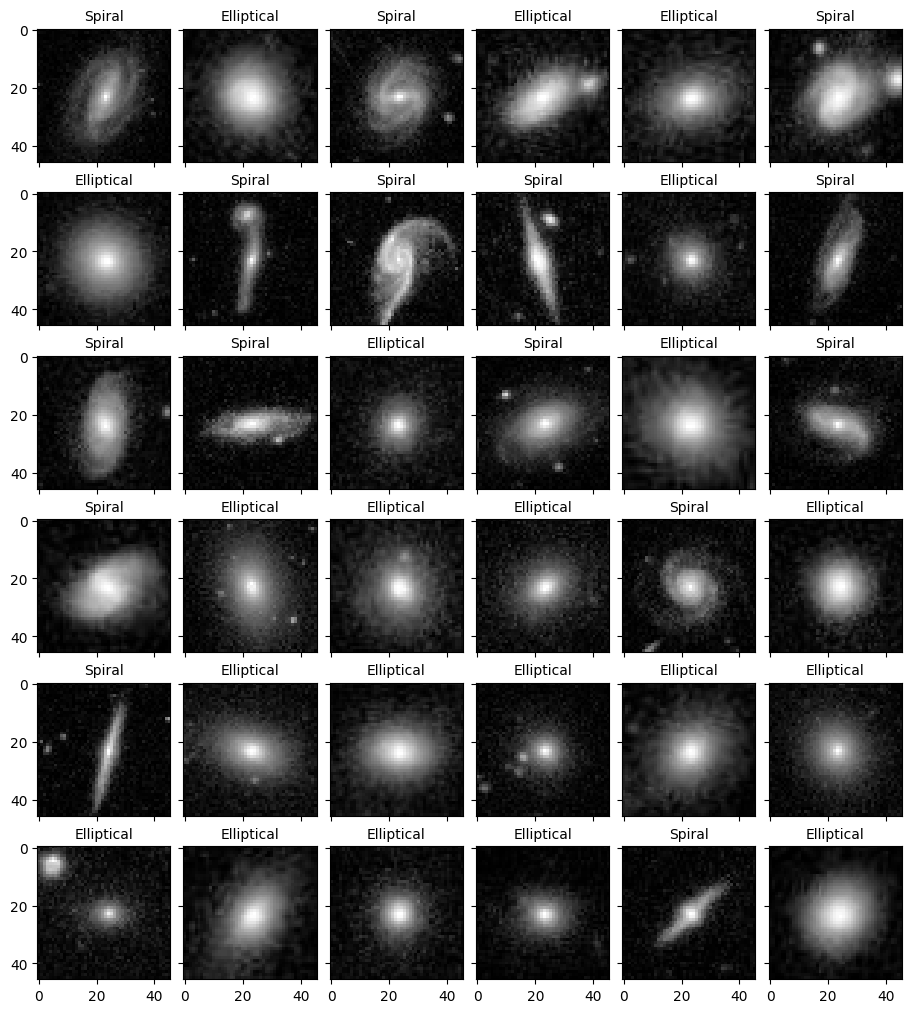

In [13]:
fig, axes = plt.subplots(6, 6, figsize=(9,10),
                         sharex=True, sharey=True, layout='constrained')

ind = np.random.randint(0, X_train.shape[0], 36)

for ii, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[ind[ii]])

    if y_train[ind[ii]] == 0:
        ax.set_title('Elliptical', fontsize=10)
    else:
        ax.set_title('Spiral', fontsize=10)

# Unsupervised Learning

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# take 20 from elliptical and 20 from spiral for the experiment
ell_20 = ell_lum[:20]
spi_20 = spi_lum[:20]

X_Gaussian = np.concatenate((ell_20, spi_20))

In [ ]:
gm = GaussianMixture(n_components=2, n_init=10, random_state=8964)
y_pred = gm.fit_predict(X_Gaussian.reshape(40, -1))

In [ ]:
def nRowCol(nImg):
    nrow = round(np.sqrt(nImg) / 1.1)
    if nrow == 0:
        nrow = 1
    ncol = int(np.ceil(nImg / nrow))
    return nrow, ncol

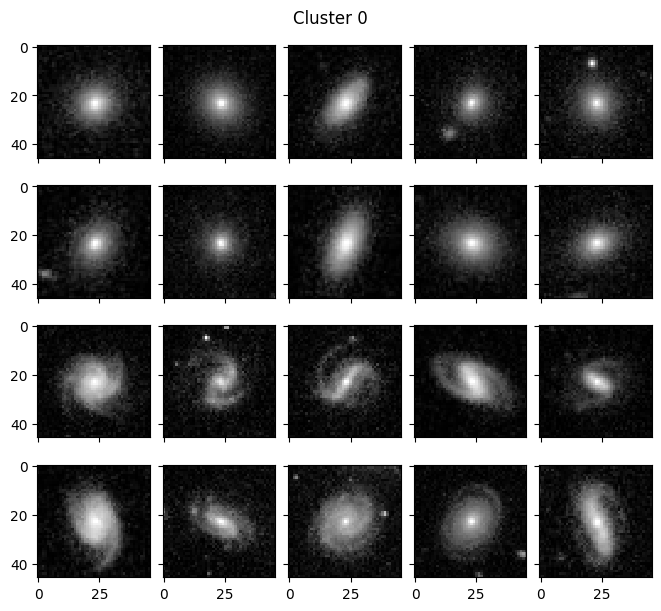

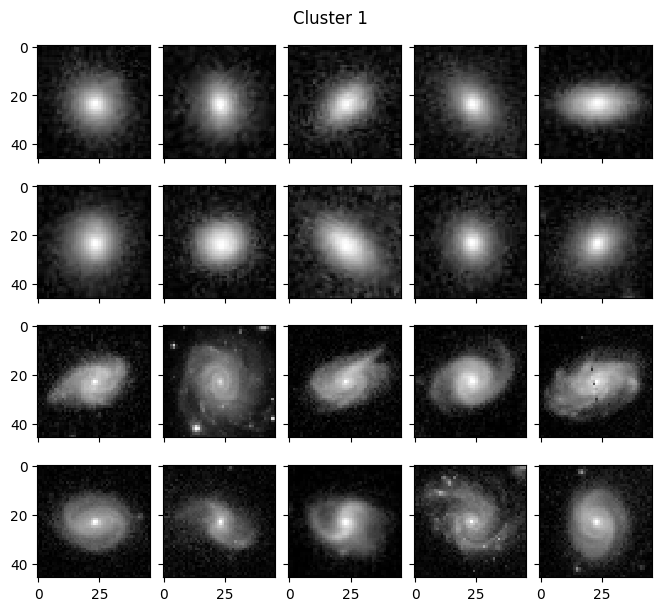

In [ ]:
for ii in np.unique(y_pred):

    n = np.sum(y_pred == ii)
    nrow, ncol = nRowCol(n)
    fig, axes = plt.subplots(nrow, ncol, figsize=(1.3*ncol, 1.5*nrow),
                         sharex=True, sharey=True, layout='constrained')
    for i in range(n):
        axes[i // ncol, i % ncol].imshow(X_Gaussian[y_pred == ii][i])
    plt.suptitle(f'Cluster {ii}')

Try more clusters.

In [ ]:
gm = GaussianMixture(n_components=8, n_init=10, random_state=8964)
y_pred = gm.fit_predict(X_Gaussian.reshape(40, -1))

In [ ]:
def nRowCol(nImg):
    nrow = round(np.sqrt(nImg) / 1.1)
    if nrow == 0:
        nrow = 1
    ncol = int(np.ceil(nImg / nrow))
    return nrow, ncol

In [ ]:
y_pred

array([1, 7, 1, 4, 4, 5, 5, 5, 0, 4, 2, 4, 5, 1, 2, 7, 4, 4, 5, 4, 0, 4,
       1, 0, 3, 3, 2, 2, 2, 7, 7, 5, 2, 7, 5, 0, 1, 6, 7, 4])

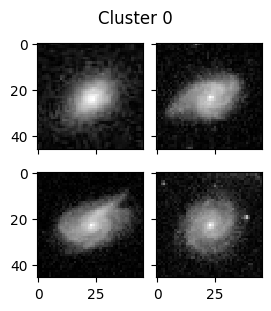

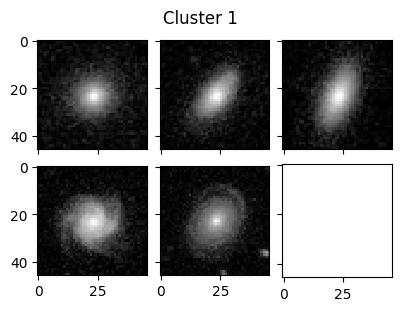

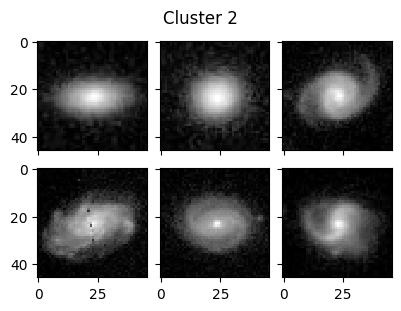

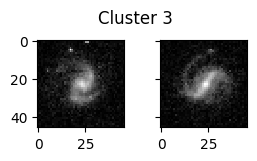

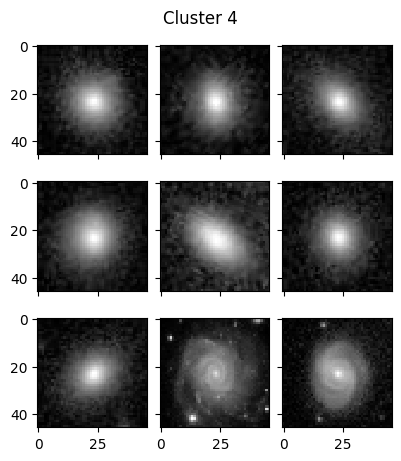

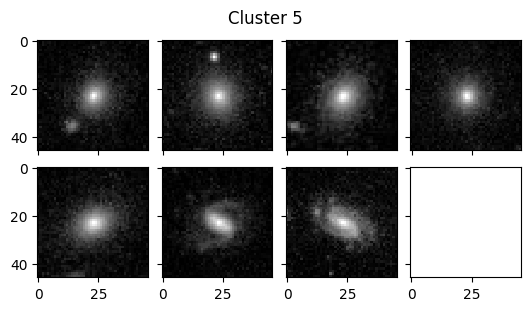

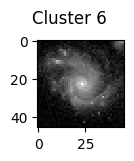

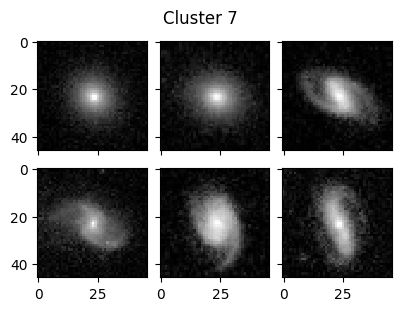

In [ ]:
for ii in np.unique(y_pred):

    n = np.sum(y_pred == ii)
    nrow, ncol = nRowCol(n)
    fig, axes = plt.subplots(nrow, ncol, figsize=(1.3*ncol, 1.5*nrow),
                         sharex=True, sharey=True, layout='constrained', squeeze=False)
    for i in range(n):
        axes[i // ncol, i % ncol].imshow(X_Gaussian[y_pred == ii][i])
    plt.suptitle(f'Cluster {ii}')

### Conclusion
The Gaussian mixture does not work for this purpose. It actually makes sense.

# MLP

In [21]:
X_train.shape, X_test.shape

((8000, 46, 46), (2000, 46, 46))

In [26]:
N_epoch = 50

Try 1 hidden layer with 256 neurons

In [49]:
keras.backend.clear_session()
tf.random.set_seed(8964)
layerI = keras.layers.Input(shape=(46, 46))
layer1 = keras.layers.Flatten()
layer2 = keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal')
layerO = keras.layers.Dense(1, activation='sigmoid')

layers = [layerI, layer1, layer2, layerO]
model = keras.Sequential(layers)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 2116)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         541,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,209 (2.07 MB)

 Trainable params: 542,209 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6959 - loss: 0.6077 - val_accuracy: 0.7812 - val_loss: 0.4931
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8125 - loss: 0.4522 - val_accuracy: 0.8012 - val_loss: 0.4575
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8428 - loss: 0.4016 - val_accuracy: 0.8106 - val_loss: 0.4508
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8592 - loss: 0.3727 - val_accuracy: 0.8219 - val_loss: 0.4433
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8712 - loss: 0.3466 - val_accuracy: 0.8263 - val_loss: 0.4371
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8828 - loss: 0.3240 - val_accuracy: 0.8294 - val_loss: 0.4322
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8957 - loss: 0.3033 - val_accuracy: 0.8263 - val_loss: 0.4263
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8999 - loss: 0.2864 - val_accuracy

In [52]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9713 - loss: 0.0995
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8875 - loss: 0.4273
Training accuracy : 0.94762
Testing accuracy  : 0.88550


Try 2 hidden layer with 128 neurons each

In [41]:
keras.backend.clear_session()
tf.random.set_seed(8964)
layerI = keras.layers.Input(shape=(46, 46))
layer1 = keras.layers.Flatten()
layer2 = keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal')
layer3 = keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal')
layerO = keras.layers.Dense(1, activation='sigmoid')

layers = [layerI, layer1, layer2, layer3, layerO]
model = keras.Sequential(layers)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 2116)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         270,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,617 (1.10 MB)

 Trainable params: 287,617 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6883 - loss: 0.5912 - val_accuracy: 0.7912 - val_loss: 0.4793
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8229 - loss: 0.4381 - val_accuracy: 0.8169 - val_loss: 0.4423
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8490 - loss: 0.3870 - val_accuracy: 0.8194 - val_loss: 0.4344
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8667 - loss: 0.3529 - val_accuracy: 0.8288 - val_loss: 0.4246
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8797 - loss: 0.3252 - val_accuracy: 0.8331 - val_loss: 0.4225
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8926 - loss: 0.2995 - val_accuracy: 0.8356 - val_loss: 0.4139
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9006 - loss: 0.2711 - val_accuracy: 0.8331 - val_loss: 0.4295
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9108 - loss: 0.2506 - val_accuracy: 0

In [48]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0840
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8828 - loss: 0.5456
Training accuracy : 0.95250
Testing accuracy  : 0.87900


# Shallow CNN

In [15]:
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)

In [57]:
N_epoch = 10

In [80]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(9, (5, 5), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Flatten()
layer4 = keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layerO]
model = keras.models.Sequential(layers)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 42, 42, 9)           │             234 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 21, 21, 9)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3969)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          39,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,945 (156.04 KB)

 Trainable params: 39,945 (156.04 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7537 - loss: 0.5502 - val_accuracy: 0.8512 - val_loss: 0.3797
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8751 - loss: 0.3274 - val_accuracy: 0.8725 - val_loss: 0.3246
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9012 - loss: 0.2702 - val_accuracy: 0.8856 - val_loss: 0.2964
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9123 - loss: 0.2379 - val_accuracy: 0.9000 - val_loss: 0.2785
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9203 - loss: 0.2148 - val_accuracy: 0.9094 - val_loss: 0.2650
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9246 - loss: 0.1969 - val_accuracy: 0.9075 - val_loss: 0.2582
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9273 - loss: 0.1832 - val_accuracy: 0.9069 - val_loss: 0.2600
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9344 - loss: 0.1726 - val_

In [83]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9127 - loss: 0.2017
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9014 - loss: 0.2499
Training accuracy : 0.90788
Testing accuracy  : 0.90150


In [76]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(3, (5, 5), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(6, (5, 5), activation="relu", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layerO]
model = keras.models.Sequential(layers)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [77]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 42, 42, 3)           │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 21, 21, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 6)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           3,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,395 (17.17 KB)

 Trainable params: 4,395 (17.17 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.6458 - loss: 0.6340 - val_accuracy: 0.8438 - val_loss: 0.3927
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.8613 - loss: 0.3539 - val_accuracy: 0.8625 - val_loss: 0.3227
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8857 - loss: 0.2860 - val_accuracy: 0.8687 - val_loss: 0.2996
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8962 - loss: 0.2633 - val_accuracy: 0.8769 - val_loss: 0.2834
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9020 - loss: 0.2488 - val_accuracy: 0.8863 - val_loss: 0.2710
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9080 - loss: 0.2363 - val_accuracy: 0.8925 - val_loss: 0.2660
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9106 - loss: 0.2257 - val_accuracy: 0.8950 - val_loss: 0.2572
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9174 - loss: 0.2155 - v

In [79]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9277 - loss: 0.1914
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9254 - loss: 0.1957
Training accuracy : 0.92475
Testing accuracy  : 0.92150


Apply early stop to see how well the shallow CNN get

In [84]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(3, (5, 5), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(6, (5, 5), activation="relu", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layerO]
model = keras.models.Sequential(layers)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2,
                    callbacks=[early_stopping_cb])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.6063 - loss: 0.6267 - val_accuracy: 0.8669 - val_loss: 0.4980
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.8650 - loss: 0.4783 - val_accuracy: 0.8656 - val_loss: 0.4529
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8796 - loss: 0.4380 - val_accuracy: 0.8737 - val_loss: 0.4182
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8854 - loss: 0.4064 - val_accuracy: 0.8769 - val_loss: 0.3912
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8916 - loss: 0.3796 - val_accuracy: 0.8813 - val_loss: 0.3700
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.8971 - loss: 0.3565 - val_accuracy: 0.8844 - val_loss: 0.3548
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9022 - loss: 0.3359 - val_accuracy: 0.8863 - val_loss: 0.3366
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9065 - loss: 0.

In [86]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9711 - loss: 0.0732
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9452 - loss: 0.1501
Training accuracy : 0.96725
Testing accuracy  : 0.94250


<Axes: xlabel='Epoch'>

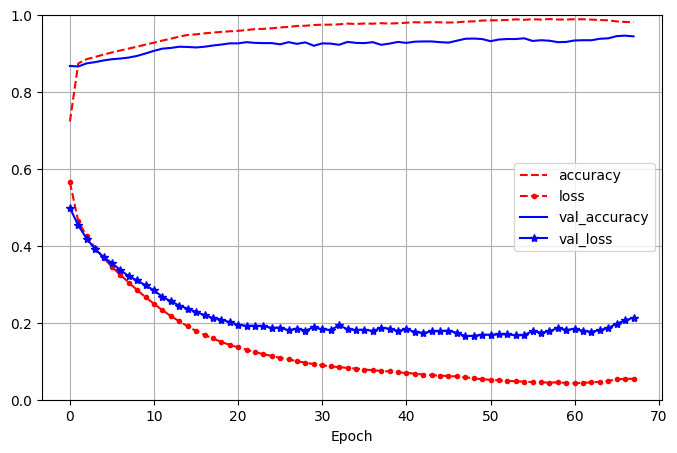

In [87]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])


# Deep CNN and Fine Tuning

* Different optimizers
    * adam
    * adamW
* Try dropout to limit overfitting
* Different activations
    * relu
    * leaky relu
    * sigmoid




In [52]:
N_epoch = 20

In [53]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")
layer7 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 42, 42, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         204,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 259,547 (1013.86 KB)

 Trainable params: 259,547 (1013.86 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7318 - loss: 0.5025 - val_accuracy: 0.8906 - val_loss: 0.2724
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9053 - loss: 0.2411 - val_accuracy: 0.9169 - val_loss: 0.2072
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9365 - loss: 0.1647 - val_accuracy: 0.9350 - val_loss: 0.1649
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9551 - loss: 0.1173 - val_accuracy: 0.9500 - val_loss: 0.1240
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.0840 - val_accuracy: 0.9581 - val_loss: 0.1083
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9771 - loss: 0.0640 - val_accuracy: 0.9625 - val_loss: 0.1113
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9779 - loss: 0.0625 - val_accuracy: 0.9569 - val_loss: 0.1199
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.0500 - val_accuracy: 0

In [56]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0179
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9606 - loss: 0.1493
Training accuracy : 0.98738
Testing accuracy  : 0.96050


<Axes: xlabel='Epoch'>

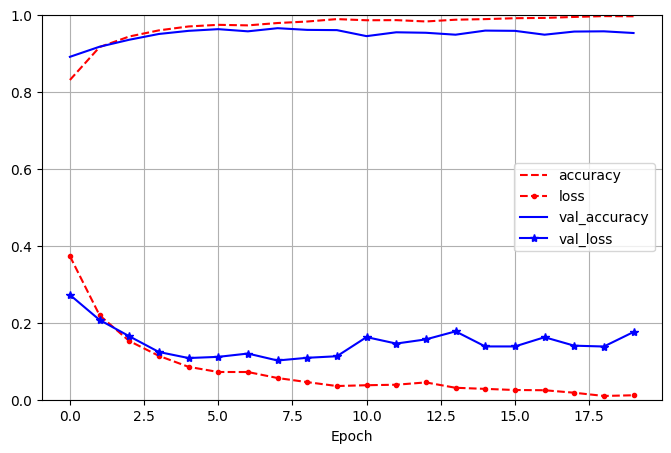

In [57]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])

adamW

In [63]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")
layer7 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adamW", metrics=["accuracy"])

In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 42, 42, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         204,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 259,547 (1013.86 KB)

 Trainable params: 259,547 (1013.86 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7290 - loss: 0.5070 - val_accuracy: 0.8844 - val_loss: 0.2860
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9119 - loss: 0.2258 - val_accuracy: 0.9287 - val_loss: 0.1838
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9435 - loss: 0.1535 - val_accuracy: 0.9381 - val_loss: 0.1622
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9614 - loss: 0.1140 - val_accuracy: 0.9506 - val_loss: 0.1343
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9709 - loss: 0.0862 - val_accuracy: 0.9600 - val_loss: 0.1135
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9745 - loss: 0.0692 - val_accuracy: 0.9644 - val_loss: 0.1092
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9745 - loss: 0.0661 - val_accuracy: 0.9613 - val_loss: 0.1109
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.0582 - val_accuracy: 0.

In [66]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9926 - loss: 0.0244
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9568 - loss: 0.1479
Training accuracy : 0.98650
Testing accuracy  : 0.95450


<Axes: xlabel='Epoch'>

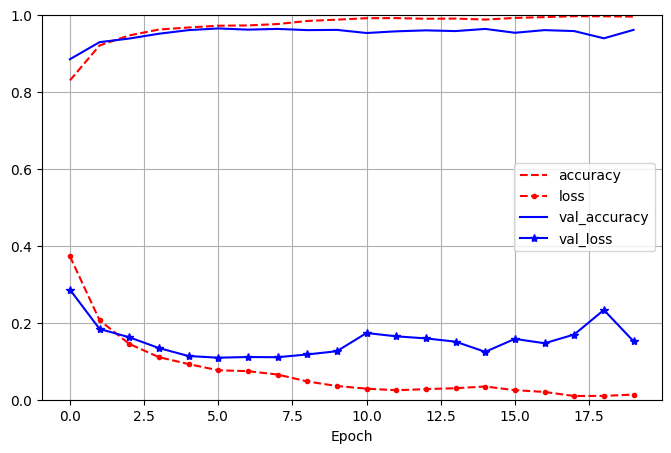

In [67]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])

Add dropout

In [96]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")
layer7 = keras.layers.Dropout(0.5)
layer8 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")
layer9 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [97]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6604 - loss: 0.6045 - val_accuracy: 0.8781 - val_loss: 0.3087
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8770 - loss: 0.3540 - val_accuracy: 0.8944 - val_loss: 0.2589
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8933 - loss: 0.2929 - val_accuracy: 0.8969 - val_loss: 0.2577
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9185 - loss: 0.2340 - val_accuracy: 0.9075 - val_loss: 0.2264
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9341 - loss: 0.1851 - val_accuracy: 0.9325 - val_loss: 0.1898
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9516 - loss: 0.1538 - val_accuracy: 0.9531 - val_loss: 0.1321
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9565 - loss: 0.1223 - val_accuracy: 0.9613 - val_loss: 0.1148
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9634 - loss: 0.1128 - val_accuracy: 0.

In [98]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0244
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9732 - loss: 0.0837
Training accuracy : 0.98875
Testing accuracy  : 0.96950


<Axes: xlabel='Epoch'>

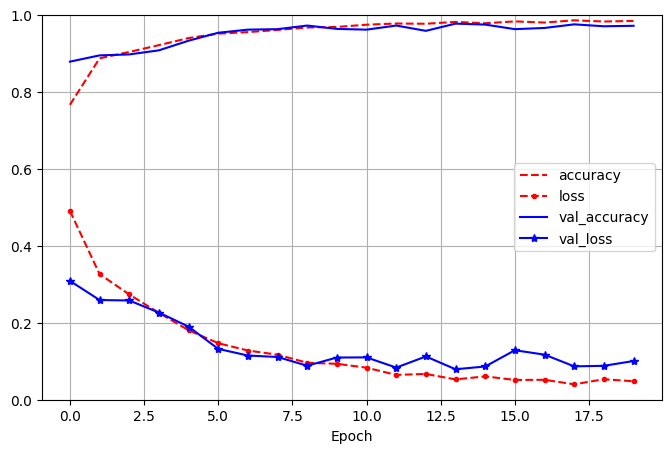

In [99]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])


Leaky relu

In [72]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

leaky_relu = keras.layers.LeakyReLU(negative_slope=0.1)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation=leaky_relu, kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation=leaky_relu, kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")
layer7 = keras.layers.Dropout(0.5)
layer8 = keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")
layer9 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6154 - loss: 0.6496 - val_accuracy: 0.8394 - val_loss: 0.3489
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8654 - loss: 0.3531 - val_accuracy: 0.8819 - val_loss: 0.2966
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9052 - loss: 0.2607 - val_accuracy: 0.9112 - val_loss: 0.2417
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9291 - loss: 0.2033 - val_accuracy: 0.9156 - val_loss: 0.2282
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9499 - loss: 0.1483 - val_accuracy: 0.9325 - val_loss: 0.1749
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.1176 - val_accuracy: 0.9513 - val_loss: 0.1269
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9676 - loss: 0.0951 - val_accuracy: 0.9469 - val_loss: 0.1409
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9664 - loss: 0.0929 - val_accuracy: 0.

In [74]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0445
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9664 - loss: 0.1187
Training accuracy : 0.97975
Testing accuracy  : 0.96100


<Axes: xlabel='Epoch'>

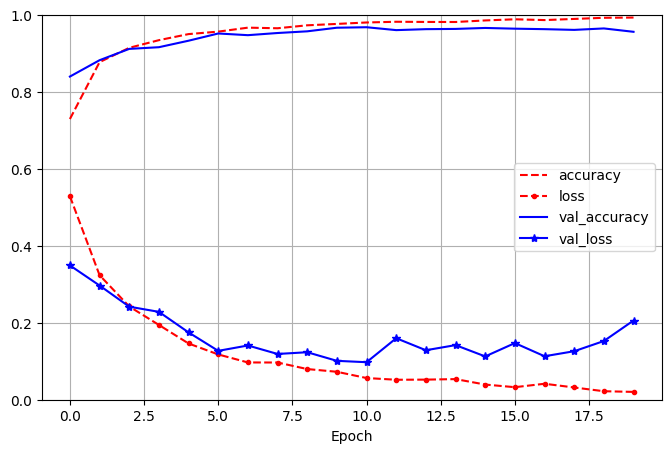

In [75]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])


Leaky relue 0.01

In [86]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

leaky_relu = keras.layers.LeakyReLU(negative_slope=0.01)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation=leaky_relu, kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation=leaky_relu, kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")
layer7 = keras.layers.Dropout(0.5)
layer8 = keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")
layer9 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [87]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6362 - loss: 0.6198 - val_accuracy: 0.8644 - val_loss: 0.3264
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8822 - loss: 0.3151 - val_accuracy: 0.8975 - val_loss: 0.2580
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9172 - loss: 0.2415 - val_accuracy: 0.9262 - val_loss: 0.2039
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9390 - loss: 0.1743 - val_accuracy: 0.9375 - val_loss: 0.1812
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9555 - loss: 0.1288 - val_accuracy: 0.9600 - val_loss: 0.1207
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9622 - loss: 0.0992 - val_accuracy: 0.9538 - val_loss: 0.1436
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9687 - loss: 0.0850 - val_accuracy: 0.9606 - val_loss: 0.1223
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9717 - loss: 0.0807 - val_accuracy: 0.

In [88]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9842 - loss: 0.0388
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9705 - loss: 0.1089
Training accuracy : 0.97925
Testing accuracy  : 0.96550


<Axes: xlabel='Epoch'>

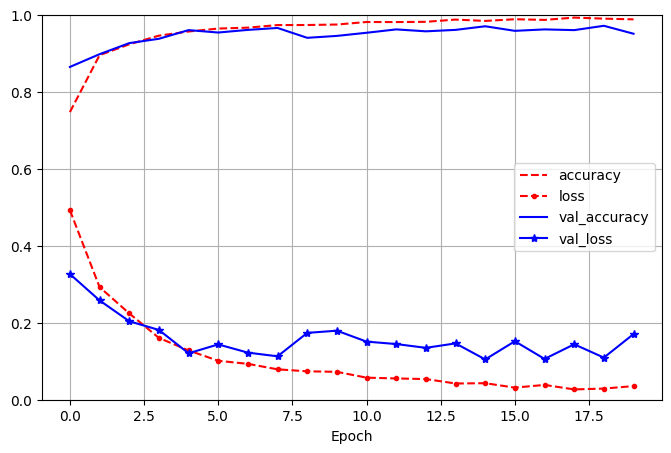

In [89]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])


leaky relue 0.3

In [91]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

leaky_relu = keras.layers.LeakyReLU(negative_slope=0.3)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation=leaky_relu, kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation=leaky_relu, kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")
layer7 = keras.layers.Dropout(0.5)
layer8 = keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")
layer9 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [92]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6648 - loss: 0.5973 - val_accuracy: 0.8856 - val_loss: 0.3003
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8899 - loss: 0.2924 - val_accuracy: 0.9250 - val_loss: 0.1954
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9350 - loss: 0.1884 - val_accuracy: 0.9369 - val_loss: 0.1598
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9490 - loss: 0.1426 - val_accuracy: 0.9431 - val_loss: 0.1450
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9598 - loss: 0.1206 - val_accuracy: 0.9538 - val_loss: 0.1313
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9653 - loss: 0.1002 - val_accuracy: 0.9563 - val_loss: 0.1149
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9739 - loss: 0.0815 - val_accuracy: 0.9563 - val_loss: 0.1058
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9719 - loss: 0.0756 - val_accuracy: 0.

In [93]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9916 - loss: 0.0266
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9658 - loss: 0.1526
Training accuracy : 0.98413
Testing accuracy  : 0.96550


<Axes: xlabel='Epoch'>

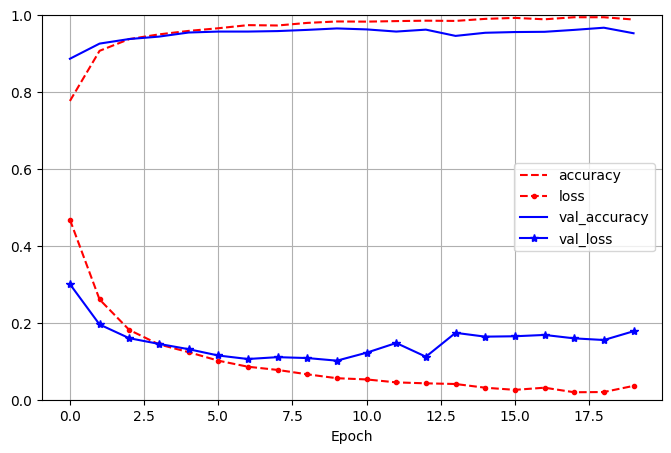

In [95]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])


Sigmoid

In [82]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation="sigmoid", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="sigmoid", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation="sigmoid", kernel_initializer="he_normal")
layer7 = keras.layers.Dropout(0.5)
layer8 = keras.layers.Dense(50, activation="sigmoid", kernel_initializer="he_normal")
layer9 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [83]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5049 - loss: 0.7543 - val_accuracy: 0.5075 - val_loss: 0.6931
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5053 - loss: 0.7116 - val_accuracy: 0.5075 - val_loss: 0.6930
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4856 - loss: 0.7072 - val_accuracy: 0.5075 - val_loss: 0.6931
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4982 - loss: 0.7017 - val_accuracy: 0.4925 - val_loss: 0.6931
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5093 - loss: 0.6968 - val_accuracy: 0.5075 - val_loss: 0.6931
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5049 - loss: 0.6952 - val_accuracy: 0.4925 - val_loss: 0.6932
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5056 - loss: 0.6969 - val_accuracy: 0.4925 - val_loss: 0.6932
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4817 - loss: 0.6967 - val_accu

In [84]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5003 - loss: 0.6931
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5050 - loss: 0.6931
Training accuracy : 0.49988
Testing accuracy  : 0.50050


<Axes: xlabel='Epoch'>

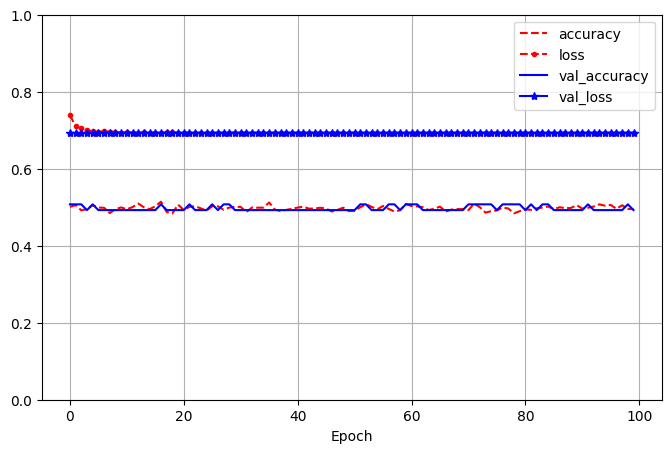

In [85]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])


l2 regulation

In [108]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.003))
layer7 = keras.layers.Dropout(0.5)
layer8 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.003))
layer9 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [109]:
history = model.fit(X_train, y_train, epochs=N_epoch, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6464 - loss: 1.0439 - val_accuracy: 0.8794 - val_loss: 0.4801
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8900 - loss: 0.4580 - val_accuracy: 0.9081 - val_loss: 0.3298
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9198 - loss: 0.3283 - val_accuracy: 0.8944 - val_loss: 0.3357
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9337 - loss: 0.2587 - val_accuracy: 0.9262 - val_loss: 0.2500
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9465 - loss: 0.2246 - val_accuracy: 0.9319 - val_loss: 0.2287
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9516 - loss: 0.1998 - val_accuracy: 0.9388 - val_loss: 0.2038
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9548 - loss: 0.1833 - val_accuracy: 0.9419 - val_loss: 0.2042
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9616 - loss: 0.1666 - val_accuracy: 0

In [110]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9754 - loss: 0.1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9691 - loss: 0.1242
Training accuracy : 0.97462
Testing accuracy  : 0.96400


<Axes: xlabel='Epoch'>

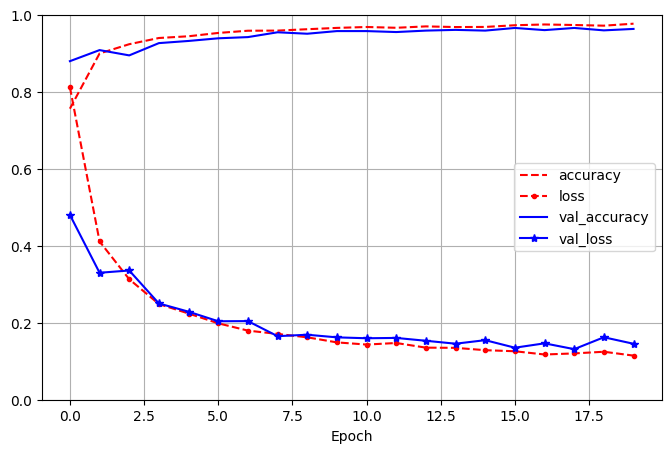

In [111]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])


early stopping

In [124]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.003))
layer7 = keras.layers.Dropout(0.5)
layer8 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.003))
layer9 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [125]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2,
                    callbacks=[early_stopping_cb])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6571 - loss: 0.9802 - val_accuracy: 0.8750 - val_loss: 0.4572
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8802 - loss: 0.4677 - val_accuracy: 0.8969 - val_loss: 0.3484
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9024 - loss: 0.3475 - val_accuracy: 0.9212 - val_loss: 0.2781
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9228 - loss: 0.2804 - val_accuracy: 0.9325 - val_loss: 0.2408
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9376 - loss: 0.2316 - val_accuracy: 0.9344 - val_loss: 0.2316
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9503 - loss: 0.1976 - val_accuracy: 0.9319 - val_loss: 0.2370
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9574 - loss: 0.1789 - val_accuracy: 0.9444 - val_loss: 0.1983
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9609 - loss: 0.1606 - val_accu

In [126]:
loss_tr, acc_tr = model.evaluate(X_train, y_train)
loss_te, acc_te = model.evaluate(X_test, y_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9954 - loss: 0.0492
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9860 - loss: 0.0855
Training accuracy : 0.99287
Testing accuracy  : 0.98350


<Axes: xlabel='Epoch'>

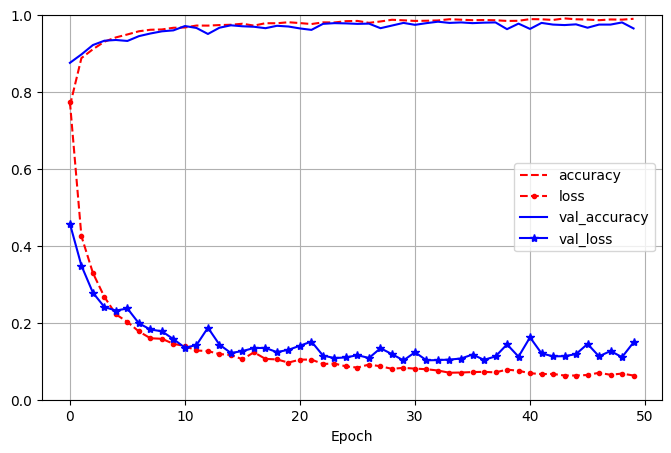

In [127]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])


# Try RGB Data

In [128]:
X_color_train, X_color_test, y_color_train, y_color_test = train_test_split(np.concatenate((ell, spi)), y, test_size=0.2, random_state=8964)

In [129]:
X_color_train.shape, X_color_test.shape, y_color_train.shape, y_color_test.shape

((8000, 46, 46, 3), (2000, 46, 46, 3), (8000,), (2000,))

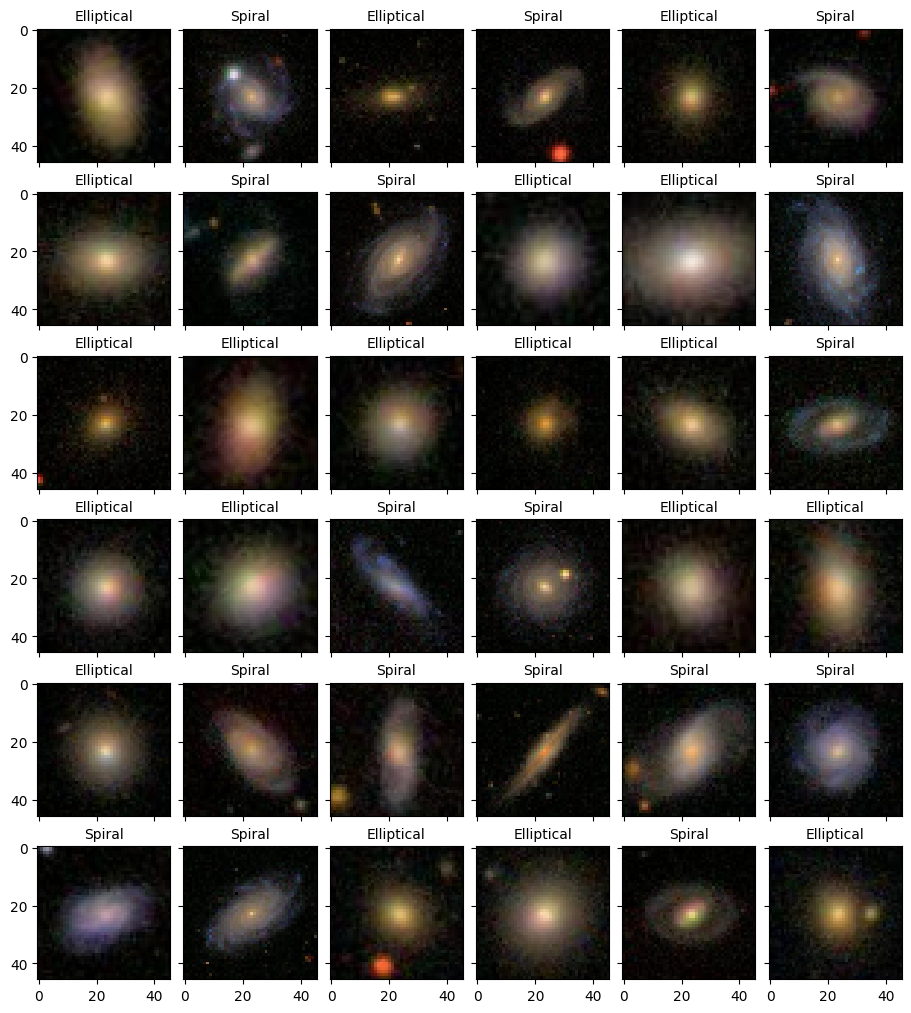

In [136]:
fig, axes = plt.subplots(6, 6, figsize=(9,10),
                         sharex=True, sharey=True, layout='constrained')

ind = np.random.randint(0, X_color_train.shape[0], 36)

for ii, ax in enumerate(axes.flatten()):
    ax.imshow(X_color_train[ind[ii]])

    if y_color_train[ind[ii]] == 0:
        ax.set_title('Elliptical', fontsize=10)
    else:
        ax.set_title('Spiral', fontsize=10)

In [131]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_color_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.005))
layer7 = keras.layers.Dropout(0.5)
layer8 = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.005))
layer9 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(1, activation="sigmoid")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layerO]

model = keras.models.Sequential(layers)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [132]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(X_color_train, y_color_train, epochs=100, validation_split=0.2,
                    callbacks=[early_stopping_cb])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6931 - loss: 1.1792 - val_accuracy: 0.8869 - val_loss: 0.4892
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8919 - loss: 0.4776 - val_accuracy: 0.9169 - val_loss: 0.3241
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9180 - loss: 0.3323 - val_accuracy: 0.9237 - val_loss: 0.2547
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9313 - loss: 0.2766 - val_accuracy: 0.9463 - val_loss: 0.2346
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9362 - loss: 0.2455 - val_accuracy: 0.9425 - val_loss: 0.2235
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9488 - loss: 0.2140 - val_accuracy: 0.9519 - val_loss: 0.1792
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9538 - loss: 0.1944 - val_accuracy: 0.9556 - val_loss: 0.1674
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9608 - loss: 0.1737 - val_acc

In [134]:
loss_tr, acc_tr = model.evaluate(X_color_train, y_color_train)
loss_te, acc_te = model.evaluate(X_color_test, y_color_test)

print("Training accuracy : {0:.5f}".format(acc_tr))
print("Testing accuracy  : {0:.5f}".format(acc_te))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9970 - loss: 0.0395
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9914 - loss: 0.0688
Training accuracy : 0.99512
Testing accuracy  : 0.98800


<Axes: xlabel='Epoch'>

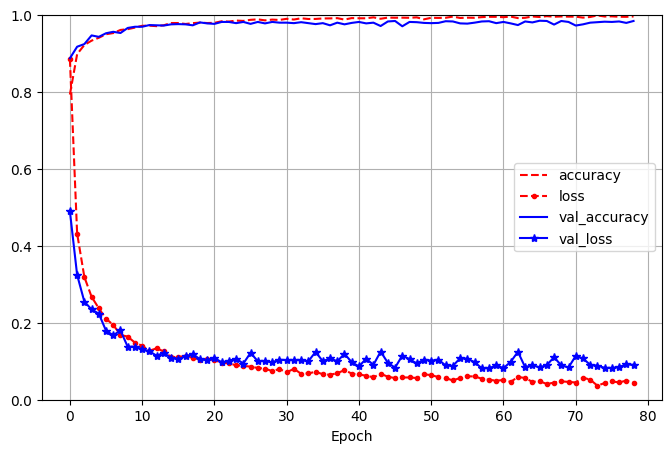

In [135]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
#  xlim=[0, 29],
 ylim=[0, 1],
 grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])
